In [1]:
import pandas as pd
import numpy as np
from geopy import geocoders
import folium

# loading pickled dataframes, making new dataframes out of them and saving them to the local drive:

In [2]:
# def pickled_df_loader (year, columns):
#     """
#     loads dataframes from the pickled dfs. 
#     """
#     df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_1")[columns]
#     df= pd.concat ([df, pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_2")[columns]]\
#                    , axis=0)
#     df= pd.concat ([df, pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_3")[columns]]\
#                    , axis=0)
    
#     df['publication_date']= df['publication_date'].apply(lambda x: x.strftime("%Y-%m-%d"))
#     df['publication_date'] = pd.to_datetime(df['publication_date'], format='%Y-%m-%d')
    
#     return df

In [3]:
# def challenge_df_generator (begin, end):
#     """
#     loads all pickled dataframes belonging to the years in the year range and returns their concatenation as a single df. 
#     """ 
    
#     columns= ['paper_title', 'publication_date', 'place_of_distribution']
    
#     df= pickled_df_loader (begin, columns)
    
#     for year in range (begin+1, end+1):
#         df= pd.concat([df, pickled_df_loader(year, columns)], axis=0)
        
#     return df

In [4]:
# df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_1915_part_1")
# df.head(20)

# Analyzing the dataframe containing all the data between 1914 and 1945:

In [5]:
# newspapers_1914_1945_df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_no_article_14_45")

In [6]:
#newspapers_1914_1945_df.head()

In [7]:
#newspapers_1914_1945_df.tail()

In [8]:
#newspapers_1914_1945_df.info()

## Let's see what we can do with the lists of the cities: 

Extracting all places of distribution and storing them in a pickled python list:

In [9]:
# unique_cities=[]
# for city in newspapers_1914_1945_df['place_of_distribution']:
#     if city not in unique_cities: 
#         unique_cities.append(city)
        
# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/unique_cities.pkl", "wb") as f:
#     pickle.dump(unique_cities, f)

In [10]:
# city_list= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/unique_cities.pkl")
# city_list

Extracting names of single cities from the pickled city list: 

In [11]:
# single_city_list= []

# for place in city_list:
#     if isinstance (place, list):
#         for i in range(0, len(place)):
#             if place[i] not in single_city_list:
#                 single_city_list.append(place[i])
#     else: 
#         if place not in city_list:
#             city_list.append(place)

# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl", "wb") as f:
#     pickle.dump(single_city_list, f)

In [12]:
# cities_1914_1945= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl")
# cities_1914_1945

Pinning the cities from a city list on the world map:

In [13]:
# def map_maker(city_list):
# #plots the cities in the city list on a map.
    
#     city_dict= {}
#     gn= geocoders.GeoNames(username="golisf")
    
#     for city in city_list:
#         if not pd.isna(city):
#             city_dict[city]= gn.geocode(city)
            
#     # Create a map centered at a location, you can adjust the coordinates and zoom level as needed
#     map_center= [51.1657, 10.4515]  # Germany's approximate center
#     my_map= folium.Map(location=map_center, zoom_start=6)
 
#     # Add markers for each city
#     for city in list(city_dict.keys()):
#         folium.Marker(location=city_dict[city], popup=city).add_to(my_map)
        
#     return my_map

In [14]:
# cities_1914_1945= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl")
# map_maker(cities_1914_1945)

## Let's see what we can do with the paper titles and publication years: 

Extracting the titles of available newspapers and storing them in a pickled python list: 

In [15]:
# unique_papers=[]
# for paper in newspapers_1914_1945_df['paper_title']:
#     if paper not in unique_papers: 
#         unique_papers.append(paper)
        
# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/unique_papers.pkl", "wb") as f:
#     pickle.dump(unique_papers, f)

In [16]:
# all_papers= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/unique_papers.pkl")
# all_papers

Create a df with the following columns: 

- name of newspaper
- cities of distribution
- date begin
- date end

In [17]:
# paper_publication_df = newspapers_1914_1945_df.groupby('paper_title').agg(
#     publication_begin=('publication_date', 'min'),
#     publication_end=('publication_date', 'max'),
#     place_of_distribution=('place_of_distribution', 'first')
# ).reset_index()

# paper_publication_df.to_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")

Running the above code, I realized that the same newspaper sometimes appears multiple times in the title, each time with minor changes (eg. issues and numbers are added to the title). So I optimized the code as below. In the below code, the newspaper title is tokenized and the the first three tokens of the title are added to the df as a separate column. Then the newspapers are grouped by the first three tokens and the newspaper_title is replaced by the shortest of newspaper title that shares the first three tokens. 

Question: Could it be that the different versions of the same newspaper have been distributed in different cities? 

- Perhaps the cities should not play an important role in the challegens. 
- Perhaps I have to write a more sophisticated code that combines all distribution places of all the versions of a single newspaper into a longer list and adds this list to the final paper_publication_df. 

In [18]:
# # Function to extract first three tokens from a string
# def extract_tokens(title):
#     tokens = title.split()
#     return ' '.join(tokens[:3])

# # Apply the function to create a new column for the first three tokens
# newspapers_1914_1945_df['first_three_tokens'] = newspapers_1914_1945_df['paper_title'].apply(extract_tokens)

# # Group by the first three tokens and aggregate to get the shortest title
# paper_publication_df = newspapers_1914_1945_df.groupby('first_three_tokens').agg(
#     paper_title=('paper_title', lambda x: min(x, key=len)),
#     publication_begin=('publication_date', 'min'),
#     publication_end=('publication_date', 'max'),
#     place_of_distribution=('place_of_distribution', 'first')
# ).reset_index()

# # Drop the temporary column
# paper_publication_df.drop(columns='first_three_tokens', inplace=True)

# paper_publication_df.to_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")

Let's see which newspapers were published between which years:

In [19]:
# paper_publication_df= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")
# paper_publication_df

In [20]:
# paper_publication_df.info()

Let's see how many "Fachzeitschriften" there are among the newspapers: 

In [21]:
# fach_papers= [paper for paper in paper_publication_df['paper_title'] if 'fach' in paper.lower()]
# paper_publication_df[paper_publication_df['paper_title'].isin(fach_papers)]

Let's see for how long each newspaper has been published after 1914:

In [22]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.ticker import MultipleLocator

# fig, ax= plt.subplots(figsize=(30, 15))
# ax.set_title('Publication span of each newspaper.' ,fontsize=25)

# for i, row in paper_publication_df.iterrows():
#     bar_length= (row['publication_end'].year - row['publication_begin'].year)
    
#     if bar_length>0:
#         ax.barh(row['paper_title'][0:50], bar_length, color='g', left=row['publication_begin'].year)
#     else:
#         #the short red bars represent newspapers that were only published within a year. 
#         ax.barh(row['paper_title'][0:50], 0.1, color='r', left=row['publication_begin'].year)
    
# ax.set_xlim (1913, 1946)
# ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
# #ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5)
# plt.xticks(ticks=np.arange(1914, 1946), rotation=45)
# plt.rcParams['xtick.labelsize'] = 15


# plt.show()

**Notes:**

1. Interestingly, the publication of a considerable amount of papers seems to have stopped in 1933.
2. Despite applying the function that extracted the first three tokens from the newspaper titles, there are still instances of the same newspaper with two different titles, one shorter and one longer. More cleaning has to be done on the titles. 

# Doing PoS tagging and NER on example articles, using spaCy and network analysis using NetworkX

## spaCy:

In [23]:
import spacy
import pandas as pd
import networkx as nx

In [24]:
df= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_1931_part_1")
df.head()

,page_id,pagenumber,paper_title,provider_ddb_id,provider,zdb_id,publication_date,language,thumbnail,plainpagefulltext,pagefulltext,pagename,preview_reference,place_of_distribution
0,225DJYUMBFFC3NZDFR3TPLGMBMR4DEXY-FILE_0001_DDB...,1,Tägliches Verzeichnis der Neuerscheinungen,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2967428-1,1931-02-27 12:00:00,[ger],6e8f9e7a-96fb-4950-b17b-2b1c36796e68,Allgemeine Ausgabe Äerzeichms öer Neuerscheinu...,[/data/altos/22/5D/225DJYUMBFFC3NZDFR3TPLGMBMR...,FILE_0001_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,NaN
1,225DJYUMBFFC3NZDFR3TPLGMBMR4DEXY-FILE_0002_DDB...,2,Tägliches Verzeichnis der Neuerscheinungen,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2967428-1,1931-02-27 12:00:00,[ger],6e8f9e7a-96fb-4950-b17b-2b1c36796e68,"Gustav Engel, Leipzig Lugel, Ou8t3v: Oer Lückt...",[/data/altos/22/5D/225DJYUMBFFC3NZDFR3TPLGMBMR...,FILE_0002_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,NaN
2,225DJYUMBFFC3NZDFR3TPLGMBMR4DEXY-FILE_0003_DDB...,3,Tägliches Verzeichnis der Neuerscheinungen,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2967428-1,1931-02-27 12:00:00,[ger],6e8f9e7a-96fb-4950-b17b-2b1c36796e68,"Wilhelm knaust, Sräfenhainichen Xeimat-Xalenäe...",[/data/altos/22/5D/225DJYUMBFFC3NZDFR3TPLGMBMR...,FILE_0003_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,NaN
3,225DJYUMBFFC3NZDFR3TPLGMBMR4DEXY-FILE_0004_DDB...,4,Tägliches Verzeichnis der Neuerscheinungen,265BI7NE7QBS4NQMZCCGIVLFR73OCOSL,Sächsische Landesbibliothek - Staats- und Univ...,2967428-1,1931-02-27 12:00:00,[ger],6e8f9e7a-96fb-4950-b17b-2b1c36796e68,"Philipp Neclam jun., Leipzig Keclams Oniversal...",[/data/altos/22/5D/225DJYUMBFFC3NZDFR3TPLGMBMR...,FILE_0004_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,NaN
4,2265UTEAQ35OORGN7JYT6GDNSOW2FNUV-ALTO4944974_D...,1,Durlacher Tagblatt : Heimatblatt für die Stadt...,INLVDM4I3AMZLTG6AE6C5GZRJKGOF75K,Badische Landesbibliothek,2919519-6,1931-01-24 12:00:00,[ger],11a88b52-9329-4692-8ae0-532e8ab557d8,e » Nr . 2 « Zweites Blatt Duvlachev Tageblatt...,[/data/altos/22/65/2265UTEAQ35OORGN7JYT6GDNSOW...,ALTO4944974_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,[Durlach]


Are there any "Fachzeitschriften" in df?

In [25]:
# fach_papers= [paper for paper in df['paper_title'] if 'fach' in paper.lower()]
# df[df['paper_title'].isin(fach_papers)]

In [26]:
random_df=df.sample(3)
random_df

,page_id,pagenumber,paper_title,provider_ddb_id,provider,zdb_id,publication_date,language,thumbnail,plainpagefulltext,pagefulltext,pagename,preview_reference,place_of_distribution
25301,AEZTCV3KIAR44PHXH5AVR7D2W7J4F2ED-ALTO11048132_...,11,Gütersloher Volks-Zeitung. 1929-1933,4EV676FQPACNVNHFEJHGKUY55BXC3QMB,Westfälische Wilhelms-Universität Münster Univ...,3091209-X,1931-04-27 12:00:00,[ger],08743c3e-88c7-441b-95ec-3dcbb2fecdf5,fall in das alte Preußen der Entrechtung würde...,[/data/altos/AE/ZT/AEZTCV3KIAR44PHXH5AVR7D2W7J...,ALTO11048132_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,[Gütersloh]
37624,DARNKDAS6U3FW2HW7YOZCGXB7P6F5INX-ALTO3886910_D...,7,General-Anzeiger. 1889-1945,VKNQFFAKOR4XZWJJKUX3NGYSZ3QZAXCW,Universitäts- und Landesbibliothek der Rheinis...,2815866-0,1931-03-31 12:00:00,[ger],6d19bb93-a260-4118-b1a0-04754ebb1afe,31 . März 1931 . Ganeral = Anzelgar für Vonn u...,[/data/altos/DA/RN/DARNKDAS6U3FW2HW7YOZCGXB7P6...,ALTO3886910_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,"[Bonn, Bad Godesberg, Siegburg, Euskirchen]"
18337,6MH2YKUZWK7QMJVCJXDETV73DZEITTB6-FILE_0006_DDB...,6,Schwäbischer Merkur : mit Schwäbischer Kronik ...,VNHXUCEEKHOUSYH4NVOUBHJGSRMOGK7J,Württembergische Landesbibliothek,2751625-8,1931-04-26 12:00:00,[ger],4da3e65f-394f-4bfe-8107-d43daf02df52,56MMt6tt Stobt * ISitzung der Technischen Abte...,[/data/altos/6M/H2/6MH2YKUZWK7QMJVCJXDETV73DZE...,FILE_0006_DDB_FULLTEXT,https://api.deutsche-digitale-bibliothek.de/bi...,[Stuttgart]


In [27]:
text_1= random_df.iloc[0,9]
text_2= random_df.iloc[1,9]
text_3= random_df.iloc[2,9]

In [28]:
#! python -m spacy download de_core_news_sm
nlp = spacy.load("de_core_news_sm")

doc_1 = nlp(text_1)
sentences_1 = list(doc_1.sents)

doc_2 = nlp(text_2)
sentences_2 = list(doc_2.sents)

doc_3 = nlp(text_3)
sentences_3 = list(doc_3.sents)

PoS (Part of Speech) tagging in the first sentence: 

In [29]:
for token in sentences_1[0]:
    print('{}: {}'.format(token.text, token.pos_))

fall: NOUN
in: ADP
das: DET
alte: ADJ
Preußen: NOUN
der: DET
Entrechtung: NOUN
würde: AUX
für: ADP
Preußen: PROPN
und: CCONJ
das: DET
Reich: NOUN
die: DET
Katastrophe: NOUN
bedeuten: VERB
.: PUNCT


A function that extracts all nouns from all sentences within a given text: 

In [30]:
def extract_nouns(text):
    
    doc = nlp(text)
    sentences = list(doc.sents)
    entities=[]
    
    for sentence in sentences:
        sentence_entities = []
        for token in sentence:
            if token.pos_ == 'NOUN':
                sentence_entities.append(token.text)
    
        if len(sentence_entities)>0:
            entities.append(sentence_entities)
    
    return entities

In [31]:
nouns_1= extract_nouns(text_1)
nouns_1

[['fall', 'Preußen', 'Entrechtung', 'Reich', 'Katastrophe'],
 ['Ausführungen', 'Beifall'],
 ['Ausland'],
 ['April'],
 ['Ruck'],
 ['Ausgang', 'Provinzialwahlen'],
 ['Wahlen',
  'Provinciale',
  'Staten',
  'Provinz',
  'Wochen',
  'Zuwachs',
  'Parteien'],
 ['Mitte', 'Wahlen', 'Niederlage'],
 ['Partei', 'Bauern', 'Kandidaten'],
 ['Freisinnige', 'Liberale', 'Liberalen', 'Verluste'],
 ['Katholiken', 'Abgeordnetenzahl', 'Verschiebung', 'Seite'],
 ['Sieger', 'Wahlen', 'Sozial', 'demokratie', 'Provinz', 'Sitz', 'Sitze'],
 ['Kommunisten', 'Groningen', 'Overisssel', 'Sitz'],
 ['Bedeutung',
  'Wahlen',
  'Zuzug',
  'Sozialdemokratie',
  'Abrüstungsfeldzug',
  'Partei',
  'Parteien',
  'Horn',
  'Anhänger',
  'Sozialisten',
  'Arme'],
 ['Ergebnis', 'Wahl', 'wahlen', 'Kammer'],
 ['Ausfall', 'Ergebnis', 'Provinzialratswah', 'Vorzeichen'],
 ['April'],
 ['Gesandter', 'Amk'],
 ['Gesandte'],
 ['Bundespräsidenten', 'Antritts', 'besuch', 'Beglaubigungsschreiben'],
 ['Gesandte',
  'Ansprache',
  'Bundesp

### Coverting noun lists into network data:

In [32]:
def get_network_data(nouns):
    final_sources = []
    final_targets = []
    for row in nouns:
        source = row[0]
        targets = row[1:]
        for target in targets:
            final_sources.append(source)
            final_targets.append(target)
    df = pd.DataFrame({'source':final_sources, 'target':final_targets})
    return df

In [33]:
network_df_1= get_network_data(nouns_1).head(40)

### Converting network data into visualized networks: 

In [34]:
G_1 = nx.from_pandas_edgelist(network_df_1)
nx.info(G_1)

'Graph with 44 nodes and 40 edges'

In [35]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5, edge_length=100):
    
    import numpy as np
    from IPython.display import SVG
    from sknetwork.visualization import svg_graph
    from sknetwork.data import Bunch
    from sknetwork.ranking import PageRank
    
#     # Compute force-directed layout
#     pos = nx.spring_layout(G, seed=42)
    
    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')
    names = np.array(list(G.nodes()))
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)
    if show_names:
        image = svg_graph(graph.adjacency, font_size=font_size,
                          node_size=node_size, names=graph.names, width=700, height=500,
                          scores=scores, edge_width=edge_width)
    else:
        image = svg_graph(graph.adjacency, node_size=node_size,
                          width=700, height=500, scores = scores, edge_width=edge_width, edge_length=edge_length)
    
    return SVG(image)

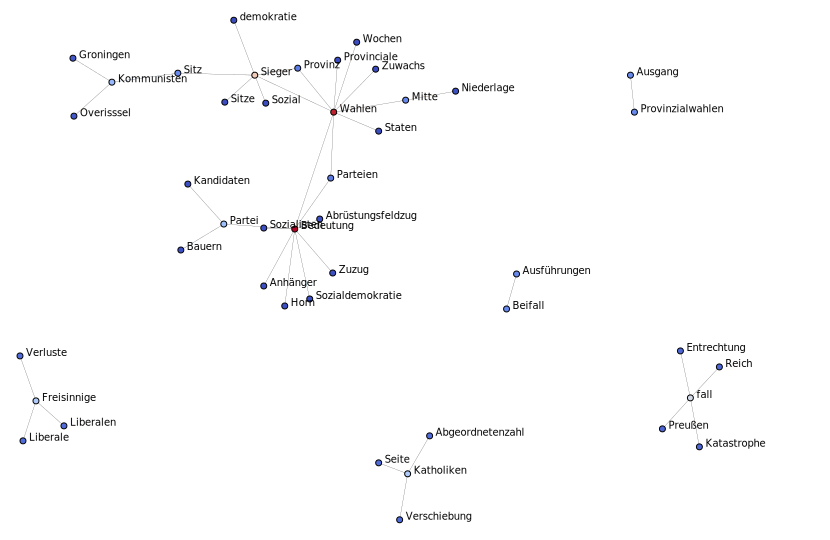

In [36]:
draw_graph(G_1, edge_width=0.2, node_size=3, show_names=True)

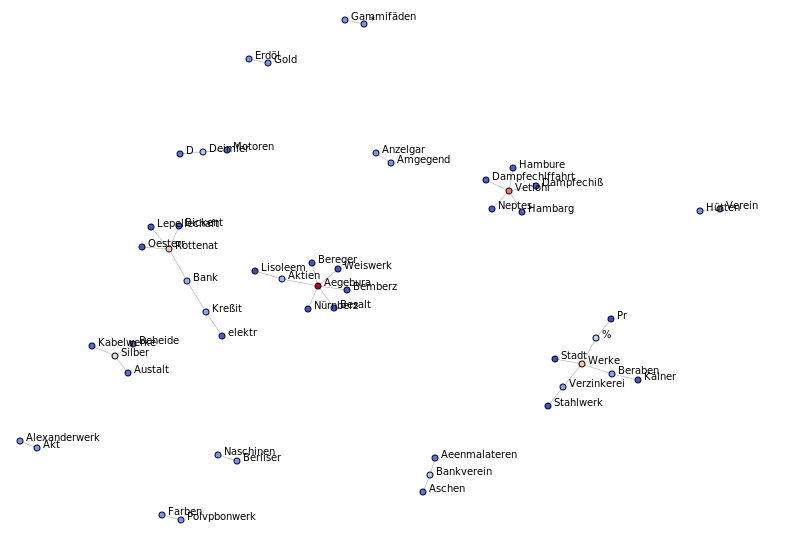

In [37]:
nouns_2= extract_nouns(text_2)
network_df_2= get_network_data(nouns_2).head(40)
G_2 = nx.from_pandas_edgelist(network_df_2)
draw_graph(G_2, edge_width=0.2, node_size=3, show_names=True)

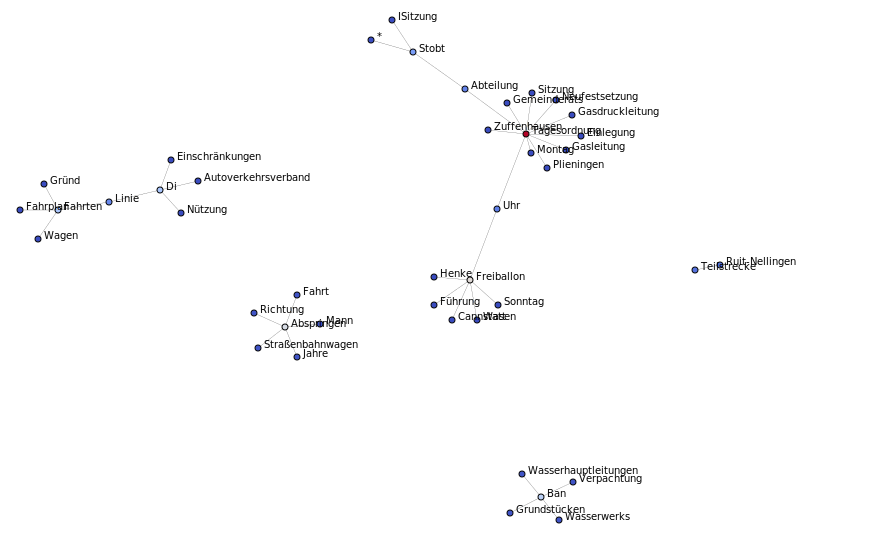

In [38]:
nouns_3= extract_nouns(text_3)
network_df_3= get_network_data(nouns_3).head(40)
G_3 = nx.from_pandas_edgelist(network_df_3)
draw_graph(G_3, edge_width=0.2, node_size=3, show_names=True)

<font color=red>RESULT:</font> Finding nouns in the newspaper data is useless, because there are lots of them and some of them are not relevant. Except we search for certain nouns such as "Nazis" or "Nationalsozialisten".

NER (Named Entity Recognition) with spaCy in the first article: 👎🏽

In [39]:
# for ent in doc_2.ents:
#     print('{}: {}'.format(ent, ent.label_))

## NLTK

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rallypal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.tokenize import sent_tokenize

sentences_1 = sent_tokenize(text_1)
sentences_1[0:5]

['fall in das alte Preußen der Entrechtung würde für Preußen und das Reich die Katastrophe bedeuten .',
 'Die Ausführungen wurden häufig mit starkem Beifall begleitet .',
 'Ausland .',
 'Holland .',
 'Haag , 25 .']

In [42]:
sentence = sentences_1[3]

from nltk.tokenize import casual_tokenize
tokens = casual_tokenize(sentence)
tokens

['Holland', '.']

In [43]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rallypal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Holland', 'NNP'), ('.', '.')]

In [44]:
from string import punctuation

def extract_entities(sentence):
    """
    extracts entities from single sentences.
    """
    
    entities = []
    tokens = casual_tokenize(sentence)
    
    for row in nltk.pos_tag(tokens):
        token = row[0]
        tag = row[1]
        if tag == 'NNP':
            for p in punctuation:
                if p in token:
                    cutoff = token.index(p)
                    token = token[:cutoff]
            if len(token) > 1:
                entities.append(token)
            
    if len(entities) > 0:
        return entities
    else:
        return None

In [45]:
# entities = [extract_entities(sentence) for sentence in sentences_1]
# len(entities)

In [46]:
# import pandas as pd

# df = pd.DataFrame({'sentence':sentences_1, 'entities':entities})
# df.head(10)

In [47]:
# df = df.dropna()
# df = df[df['entities'].apply(len)>1]
# entities = df['entities'].to_list()
# len(entities)

In [48]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def get_text_entities(text):
    
    sentences = sent_tokenize(text)
    entities = [extract_entities(sentence) for sentence in sentences]
    df = pd.DataFrame({'sentence':sentences, 'entities':entities})
    df = df.dropna()
    df = df[df['entities'].apply(len) > 1]
    entities = df['entities'].to_list()
    
    german_stop_words = stopwords.words('german')
    
    for list in entities: 
        for item in list:
            if item.lower() in german_stop_words:
                list.remove(item)
    
    return entities

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rallypal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
get_text_entities (text_1)

[['Preußen', 'Entrechtung', 'Preußen', 'Reich', 'Katastrophe'],
 ['Ausführungen', 'Beifall'],
 ['Ruck', 'Hol'],
 ['Ausgang', 'Provinzialwahlen'],
 ['Wahlen',
  'Provinciale',
  'Staten',
  'Provinz',
  'Wochen',
  'Zuwachs',
  'Parteien'],
 ['Mitte', 'Wahlen', 'Niederlage'],
 ['Partei',
  'Bauern',
  'Kandidaten',
  'De',
  'Freisinnige',
  'Liberale',
  'Liberalen',
  'Verluste'],
 ['Katholiken', 'Abgeordnetenzahl', 'Verschiebung', 'Seite'],
 ['Sieger', 'Wahlen', 'Sozial', 'Provinz', 'Limburg', 'Sitz', 'zwei', 'Sitze'],
 ['Kommunisten', 'Groningen', 'Gelderland', 'Overisssel', 'Sitz'],
 ['Bedeutung',
  'Wahlen',
  'Zuzug',
  'Sozialdemokratie',
  'Abrüstungsfeldzug',
  'Partei',
  'Parteien',
  'Horn',
  'Anhänger',
  'Sozialisten',
  'Arme'],
 ['Innerpolitisch', 'Ergebnis', 'Wahl', 'Neu', 'Erste', 'Kammer'],
 ['Ausfall', 'Ergebnis', 'Provinzialratswah', 'Vorzeichen'],
 ['Gesandter', 'Rieth', 'Amk'],
 ['Gestern',
  'überreichte',
  'Gesandte',
  'Dr',
  'Rieth',
  'Bundespräsidenten',

In [50]:
get_text_entities (text_2)

[['Ganeral', 'Anzelgar', 'Vonn', 'Amgegend'],
 ['Bertiner', 'Bürse'],
 ['Berzw', 'Ges'],
 ['Gles', 'Schalbe'],
 ['Goldechmidt', 'Th'],
 ['Gesso', 'Werke', 'Seuner', 'Stadt'],
 ['L4', 'Pfs'],
 ['Pr'],
 ['Rh', 'Westt'],
 ['Bes', 'Geldpf'],
 ['Vetiohr', 'Hambure', 'Amerike', 'Hambarg', 'Neptes'],
 ['Deutsche', 'Kreßit', 'Bank'],
 ['Werte', 'Barmer', 'Bankverein', 'Berl'],
 ['Hendels', 'Geseit'],
 ['Rottenat',
  'Deutsche',
  'Bank',
  'Bickent',
  'Lepellechaft',
  'Drosduer',
  'Benk',
  'Oesterr',
  'Credit',
  'Reichsbank',
  'Westdlsch'],
 ['Wiener', 'Bankverein', 'Aschen', 'Müschen', 'Aeenmalateren'],
 ['Aegebura',
  'Nürnberz',
  'Bereger',
  'Weiswerk',
  'Besalt',
  'Aktien',
  'Lina',
  'Bemberz',
  'Bergmann',
  'Elektr'],
 ['Berlin', 'Karler'],
 ['Berliser', 'Naschinen', 'Beuner', 'Berzwerke'],
 ['Hütten', 'Verein', 'Brauskohl'],
 ['Baderss', 'Eieen', 'Nes', 'Chem', 'Herden', 'Chem'],
 ['Grami', 'Hann'],
 ['Dahlbssch', 'Bergw'],
 ['Deimler', 'Motoren'],
 ['Deutsche',
  'Erdöl',

In [51]:
get_text_entities (text_3)

[['Stobt', 'ISitzung', 'Technischen', 'Abteilung'],
 ['Tagesordnung',
  'öffentliche',
  'Sitzung',
  'Tech',
  'Abteilung',
  'Gemeinderats',
  'Montag',
  'Uhr',
  'Einlegung',
  'Gasdruckleitung',
  'Zuffenhausen',
  'Einlegung',
  'Gasleitung',
  'Plieningen',
  'Neufestsetzung'],
 ['Ban', 'Wasserhauptleitungen', 'Verpachtung', 'Grundstücken', 'Wasserwerks'],
 ['Freiballon',
  'Etragula',
  'Sonntag',
  'Uhr',
  'Cannstatt',
  'Wasen',
  'Führung',
  'Major',
  'Henke'],
 ['Di',
  'überaus',
  'Be',
  'Nützung',
  'Linie',
  'zwingt',
  'Autoverkehrsverband',
  'Einschränkungen'],
 ['Teilstrecke', 'Ruit'],
 ['Fahrten', 'Linie', 'Wagen', 'Linie', 'Gründ', 'Fahrplan'],
 ['Beim',
  'Abspringen',
  'Straßenbahnwagen',
  'Fahrt',
  'Le',
  'Jahre',
  'Mann',
  'Richtung',
  'Radfahrer'],
 ['Beide', 'Personen', 'Kamen', 'Fall', 'Schür'],
 ['Fehltritt',
  'Tübingerstraße',
  'Jahre',
  'Maler',
  'Leitergerüst',
  'Sy',
  'Meter'],
 ['Verletzungen', 'Martenhospital'],
 ['Kirchstraße',
  '

In [52]:
network_df_1= get_network_data(get_text_entities (text_1))
network_df_1

,source,target
0,Preußen,Entrechtung
1,Preußen,Preußen
2,Preußen,Reich
3,Preußen,Katastrophe
4,Ausführungen,Beifall
...,...,...
748,Gelernte,Knechte
749,Melker,Melk
750,Melker,Ackerburschen
751,Arbeitsamt,Gütersloh


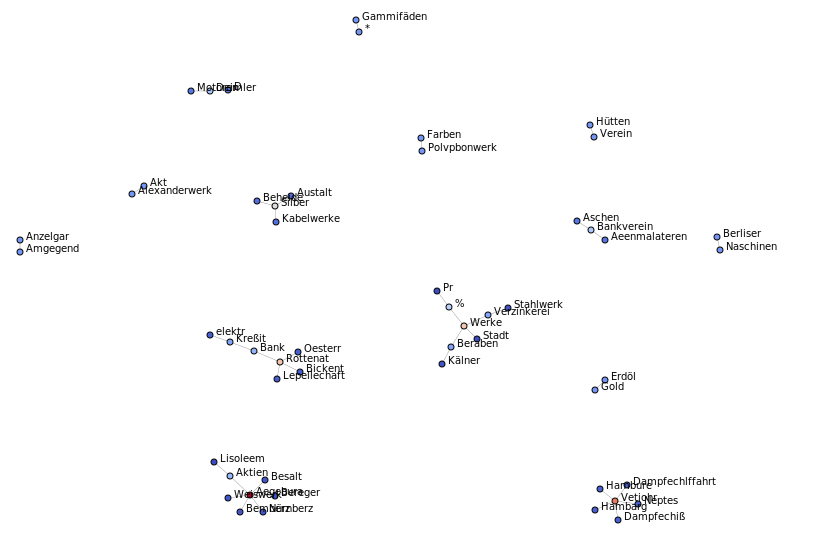

In [53]:
G_1 = nx.from_pandas_edgelist(network_df_1)
draw_graph(G_2, edge_width=0.2, node_size=3, show_names=True)

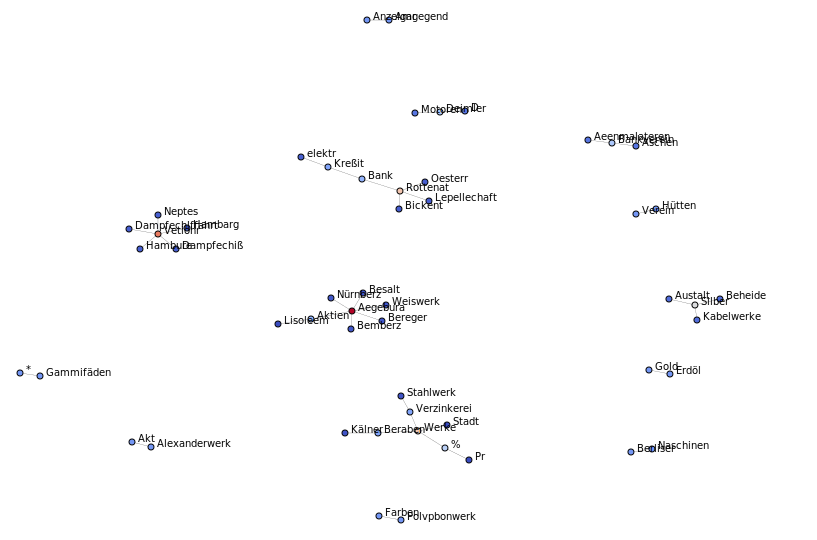

In [54]:
network_df_2= get_network_data(nouns_2).head(40)
G_2 = nx.from_pandas_edgelist(network_df_2)
draw_graph(G_2, edge_width=0.2, node_size=3, show_names=True)

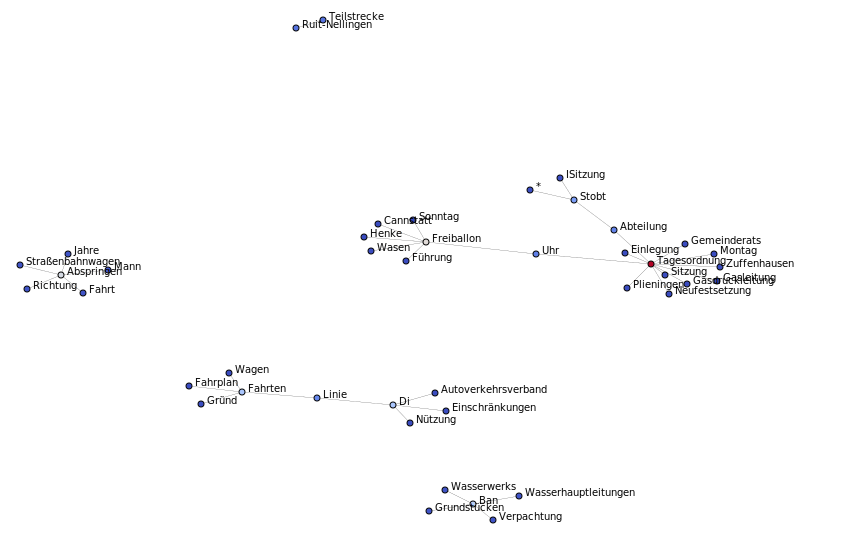

In [55]:
network_df_3= get_network_data(nouns_3).head(40)
G_3 = nx.from_pandas_edgelist(network_df_3)
draw_graph(G_3, edge_width=0.2, node_size=3, show_names=True)

In [59]:
nouns_1= extract_nouns(text_1)
# nouns_2= extract_nouns(text_2)
# nouns_3= extract_nouns(text_3)

len(nouns_1)

225

In [60]:
len(get_text_entities (text_1))
# get_text_entities (text_2)
# get_text_entities (text_3)

160

## result: spaCy performs much better than NLTK in extracting nouns and needs less cleaning. 